##**BIKESTORES ANALISYS**

# **Objetivos**

1- ¿Es posible encontrar un patrón que permita predecir que categoria y marca de bicicleta sera la que tengamos que tener mas stock para el siguiente verano dada las competencias de bicis y el cambio de paradigma hacia un mundo sin automoviles?

Nos interesa conocer el punto de venta de Bicicletas y los vendedores que han generado los mayores ingresos en los últimos años.

2- Además del análisis del patrón de ventas, nos han consultado si es posible también, definir premios y posibles reconocimientos a los vendedores que mayores ingresos por venta hayan generado en cada tienda. Como forma de incentivar el Ownership de los empleados

# **Introducción**

Contexto comercial. Trabajamos en el equipo de Ejecución Inteligente de una importante compañía de bicicletas en Estados Unidos. Es, esta area la que vela por transformar, digitalizar y poner al servicio la información. Es la que en definitiva, le da sentido a los resultados de los datos.

La compañía nació en 2016 y desde entonces ha estado en constante crecimiento. Surge, esta iniciativa, entendiendo esta oportunidad que hay en el mercado que busca migrar del automovil a bicicletas, para lograr de este mundo uno mas sustetable y asi reducir la emisión de carbono.

Por tal motivo se nos ha solicitado el análisis de ventas, entendiendo que la mayor parte de las mismas se da en verano, de las tres tiendas, Santa Cruz Bikes, Baldwin Bikes y Rowlett Bikes, en los tres estados en los que estan localizadas: Texas, New York y California.

*Problema comercial*. Nuestra tarea es responder la siguiente pregunta: ¿Es posible encontrar un patron que permita predecir que categoria y marca de bicicleta sera la que tengamos que tener mas stock para el siguiente verano dada las competencias de bicis y el cambio de paradigma hacia un mundo sin automoviles?

*Contexto analítico*. El equipo de ventas nos ha brindado el dataset en donde tenemos las ordenes de compra de bicis, de las tres tiendas en los tres estados. El mismo cuenta con toda la información del staff de ventas, las tiendas, los clientes, las ordenes, productos, marcas y por ultimo las categorias. No hay ninguna variable que nos indique exactamente que hace que una bici sea elegida por el cliente a diferencia de otra. Es por esto que el aprendizaje es no supervisado.

El caso se estructura de la siguiente manera, vamos a:

Realizar análisis de datos exploratorios para investigar visualmente la estructura de los datos
Utilizar estas observaciones para ajustar los modelos adecuados.
Calcular el total de ingresos por tienda, por vendedor, marca y categorias para realizar posteriormente los graficos correspondientes.
Detectar en base al punto 3, los de mayor ingreso.
Realizar graficos de dispersión y tendencias para, de esta manera, entender el comportamiento de la compra de clientes. Cuándo es el momento de mayor ventas, de que categoría y marca, como asi también las tiendas y estado donde se dan las mismas y que vendedor es el que tiene el mayor éxito para asi incentivarlo.
Segmentar y generar conclusiones sobre grupos específicos.

# **Desarrollo**

In [1]:
#Importación e instalación de librerias necesarias para el trabajo
!pip install chart_studio 
!pip install bqplot 
!pip install pingouin 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=dcbedbe506f105d20b8762cf6bdb1eb2483c3445655d34513a40a70a31f95583
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 4.5 MB/s 
     |████████████████████████████████| 1.6 MB 9.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 4.1 MB/s 
     |████████████████████████████████| 9.8 MB 49.9 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=3cbe94c932c87cccb51b36d653b42fc62d6160a

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import chart_studio.plotly as py
import plotly.graph_objects as go
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)
import warnings
warnings.filterwarnings('ignore')

In [3]:
import requests
import json
url='https://github.com/alyssonalvaran/bauman' 
df= requests.get(url)
print(df)

<Response [200]>


In [4]:
#Conexión con Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#Cargamos nuestra base de datos, brindada por la empresa
BikeStores =pd.read_excel('/content/gdrive/MyDrive/CODER.Aguilar.Nieto/Archivos Ventas/BikeStores.xlsx')
BikeStores.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_email,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#
0,1541.0,1.0,155.0,2.0,11999.99,0.1,1199.999,21599.982,Trek Domane SLR 9 Disc - 2018,9.0,...,venita.daniel@bikes.shop,(516) 379-4446,1.0,5.0,Venita Daniel,0.0,NaN,NaN,OK,1.0


In [6]:
#Tamaño de la base
BikeStores.shape

(1615, 52)

**Análisis de las principales variables**


Las principales variables disponibles son:

order_id: N° de identificación de la orden.

*   **product_id**: N° de identificación del producto.
*   **quantity**: Cantidad de la orden.
*   **List Price**: Precio de lista.
*   **List Price**: Precio de lista.
*   **Product**: Producto. 
*   **Brand**: Marca.
*   **Category**: Categoría a la que pertenece el producto.
*   **order_date**: Fecha de creación de la orden.
*   **shipped_date**: Fecha de despacho del producto.
*   **Store name**: Nombre de la tienda.
*   **Days between order and shipment**: Días entre la fecha de la orden y la fecha del despacho.

# **Análisis Exploratorio**

In [7]:
#Generamos una variable que calcule el total de ingresos por número de orden. Multiplicamos la cantidad de productos de la orden por el precio de lista
BikeStores['Total_Income'] = BikeStores['quantity'] * BikeStores['List_Price'] 

In [8]:
BikeStores.head(2) 

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
0,1541.0,1.0,155.0,2.0,11999.99,0.10,1199.9990,21599.9820,Trek Domane SLR 9 Disc - 2018,9.0,...,(516) 379-4446,1.0,5.0,Venita Daniel,0.0,NaN,NaN,OK,1.0,23999.98
1,1570.0,1.0,155.0,1.0,11999.99,0.07,839.9993,11159.9907,Trek Domane SLR 9 Disc - 2018,9.0,...,(516) 379-4446,1.0,5.0,Venita Daniel,0.0,NaN,NaN,OK,7.0,11999.99


## **Obtención de datos relevantes**
1)- Queremos saber cuál es el estado donde tenemos la mayor ingresos.
Para ello debemos realizar un trabajo previo, vamos a filtrar los datos del data set seprandolos por estado.

In [9]:
NewYork = BikeStores.query('Customer_state=="New York"')
NewYork.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
0,1541.0,1.0,155.0,2.0,11999.99,0.1,1199.999,21599.982,Trek Domane SLR 9 Disc - 2018,9.0,...,(516) 379-4446,1.0,5.0,Venita Daniel,0.0,NaN,NaN,OK,1.0,23999.98


In [10]:
Texas = BikeStores.query('Customer_state=="Texas"') #Filtramos del data set los datos correspondientes al estado de Texas
Texas.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
8,787.0,1.0,51.0,2.0,6499.99,0.07,454.9993,12089.9814,Trek Silque SLR 8 Women's - 2017,9.0,...,(972) 530-5556,1.0,7.0,Layla Terrell,2.0,1.0,1.0,OK,6.0,12999.98


In [11]:
California = BikeStores.query('Customer_state=="California"')
California.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
6,958.0,1.0,51.0,1.0,6499.99,0.1,649.999,5849.991,Trek Silque SLR 8 Women's - 2017,9.0,...,(831) 555-5555,1.0,1.0,Mireya Copeland,2.0,1.0,1.0,OK,7.0,6499.99


Ahora que hemos filtrado los estados, para cada uno vamos a calcular los ingresos totales

In [12]:
California.Total_Income.sum()

608408.2299999999

In [13]:
Texas.Total_Income.sum()

299609.57

In [14]:
NewYork.Total_Income.sum()

1907605.7199999995

Generamos un nuevo Data Frame para consolidar estos datos y poder confeccionar el gráfico que nos facilitará ver la información.

In [15]:
TotalesEstado = pd.DataFrame(columns=['states','total']) #Generación del DataFrame "TotalesEstado"
TotalesEstado['States'] = ['California', 'New York', 'Texas']
TotalesEstado['Totals']= [608408.22, 1907605.71, 299609.57  ]

In [16]:
x= TotalesEstado['States'] #Definimos las variables a graficar
y= TotalesEstado['Totals']

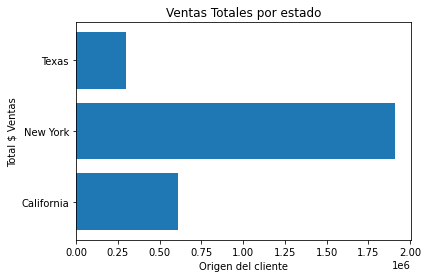

In [17]:
plt.barh(x, y)
plt.ylabel('Total $ Ventas')
plt.xlabel('Origen del cliente')
plt.title('Ventas Totales por estado')
plt.show()

Podemos observar claramente que el estado de New York es el que tiene mayor cantidad de ventas.

Solo para complementar el trabajo, hacemos el mismo análisis pero usando un gráfico de Boxplot. Vemos que el resultado permance igual. New York es el estado con mayores ventas.

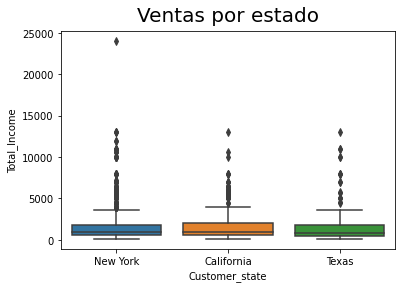

In [18]:
from IPython.core.pylabtools import figsize
sns.boxplot(x='Customer_state', y = 'Total_Income', data = BikeStores) 
sns.set(rc = {'figure.figsize':(20,5)})
plt.title("Ventas por estado", fontsize=20, verticalalignment='bottom')
plt.show()

NOTA: La companía posee una tienda en cada estado:

* New York: Tienda Baldwin Bikes
* California: Santa Cruz Bikes
* Texas: Rowlett Bikes 

Por este motivo es lo mismo analizar ventas por estado o ventas por tienda. 
Nos quedaremos con el análisis de Ventas por Estado.

También se nos ha pedido analizar las ventas por marca, para entender cual es la marca que genera mayor cantidad de ingresos.

2)- Ahora vamos a analizar las ventas por marca

Como primer paso, debemos filtrar la iformación de cada una de las tiendas

In [19]:
Trek=  BikeStores.query('Brand=="Trek"')
Trek.head(1)


,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
0,1541.0,1.0,155.0,2.0,11999.99,0.1,1199.999,21599.982,Trek Domane SLR 9 Disc - 2018,9.0,...,(516) 379-4446,1.0,5.0,Venita Daniel,0.0,NaN,NaN,OK,1.0,23999.98


In [20]:
Electra=  BikeStores.query('Brand=="Electra"')
Electra.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
168,1388.0,1.0,251.0,1.0,2999.99,0.1,299.999,2699.991,Electra Townie Commute Go! - 2018,1.0,...,(516) 379-4446,1.0,5.0,Venita Daniel,3.0,3.0,0.0,Same Day,5.0,2999.99


In [21]:
Surly=  BikeStores.query('Brand=="Surly"')
Surly.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
254,776.0,1.0,28.0,1.0,2499.99,0.2,499.998,1999.992,Surly Karate Monkey 27.5+ Frameset - 2017,8.0,...,(516) 379-4445,1.0,5.0,Marcelene Boyer,2.0,3.0,-1.0,Late,1.0,2499.99


In [22]:
SunBicycles=  BikeStores.query('Brand=="Sun Bicycles"')
SunBicycles.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
368,793.0,1.0,60.0,1.0,1559.99,0.05,77.9995,1481.9905,Sun Bicycles ElectroLite - 2017,7.0,...,(516) 379-4445,1.0,5.0,Marcelene Boyer,1.0,1.0,0.0,Same Day,4.0,1559.99


In [23]:
Haro=  BikeStores.query('Brand=="Haro"')
Haro.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
432,794.0,1.0,41.0,2.0,1469.99,0.05,73.4995,2792.981,Haro Shift R3 - 2017,2.0,...,(516) 379-4446,1.0,5.0,Venita Daniel,2.0,1.0,1.0,OK,4.0,2939.98


In [24]:
Heller=  BikeStores.query('Brand=="Heller"')
Heller.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
448,28.0,1.0,5.0,1.0,1320.99,0.05,66.0495,1254.9405,Heller Shagamaw Frame - 2016,3.0,...,(516) 379-4445,1.0,5.0,Marcelene Boyer,1.0,2.0,-1.0,Late,2.0,1320.99


In [25]:
Ritchey=  BikeStores.query('Brand=="Ritchey"')
Ritchey.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
603,290.0,1.0,2.0,2.0,749.99,0.07,52.4993,1394.9814,Ritchey Timberwolf Frameset - 2016,5.0,...,(516) 379-4445,1.0,5.0,Marcelene Boyer,1.0,2.0,-1.0,Late,2.0,1499.98


In [26]:
PureCycles=  BikeStores.query('Brand=="Pure Cycles"')
PureCycles.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
1123,6.0,1.0,18.0,1.0,449.0,0.07,31.43,417.57,Pure Cycles Western 3-Speed - Women's - 2015/2016,4.0,...,(516) 379-4445,1.0,5.0,Marcelene Boyer,3.0,1.0,2.0,OK,1.0,449.0


In [27]:
Strider=  BikeStores.query('Brand=="Strider"')
Strider.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
1545,1433.0,1.0,264.0,1.0,249.99,0.07,17.4993,232.4907,Strider Sport 16 - 2018,6.0,...,(516) 379-4446,1.0,5.0,Venita Daniel,2.0,1.0,1.0,OK,7.0,249.99


Una vez que tenemos filtradas la información sobre las tiendas, vamos a sumar de cada una de las tiendas la **cantidad** total de bicis vendidas.

In [28]:
Trek.Total_Income.sum()

1655694.02

In [29]:
Trek.quantity.sum()

598.0

In [30]:
Electra.Total_Income.sum()

458130.72

In [31]:
Electra.quantity.sum()

919.0

In [32]:
Surly.Total_Income.sum()

340398.51999999996

In [33]:
Surly.quantity.sum()

300.0

In [34]:
SunBicycles.Total_Income.sum()

138552.38999999998

In [35]:
SunBicycles.quantity.sum()

261.0

In [36]:
Haro.Total_Income.sum()

83958.69999999998

In [37]:
Haro.quantity.sum()

130.0

In [38]:
Heller.Total_Income.sum()

55481.58000000001

In [39]:
Heller.quantity.sum()

42.0

In [40]:
Ritchey.Total_Income.sum()

29249.61

In [41]:
Ritchey.quantity.sum()

39.0

In [42]:
PureCycles.Total_Income.sum()

53818.0

In [43]:
PureCycles.quantity.sum()

122.0

In [44]:
Strider.Total_Income.sum()

339.98

In [45]:
Strider.quantity.sum()

2.0

Ahora debemos generar un nuevo Data Frame con la información de los ingresos totales por marcas

In [46]:
TotalBrand = pd.DataFrame(columns=['Brand','total']) #Generación del DataFrame "TotalBrand"
TotalBrand['Brands'] = ['Trak', 'Electra', 'Surly','Sun Bicycles', 'Haro', 'Heller', 'Ritchey','PureCycles', 'Strider']
TotalBrand['Totals']= [1655694.02, 458130.72,340398.51, 138552.389, 83958.69, 55481.58 , 29249.61, 53818.0, 339.98]

In [47]:
x = TotalBrand['Brands']
y = TotalBrand['Totals']


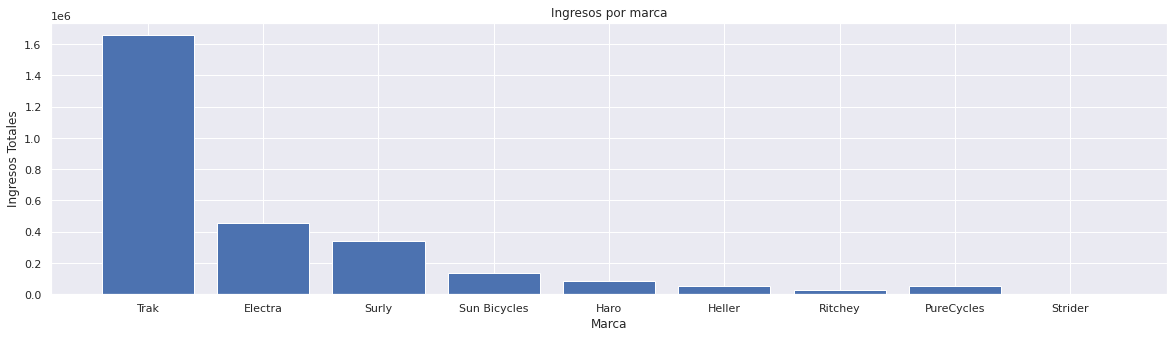

In [48]:
plt.bar(x, y)
plt.ylabel('Ingresos Totales')
plt.xlabel('Marca')
plt.title('Ingresos por marca')
plt.show()

Podemos observar que la marca más vendida es Trak.
Esto tiene mucho sentido ya que es la bici para usarse en la ciudad y sabemos, por nuestras multiples conversaciones con el cliente, que los principales clientes que tienen en los 3 estados son estudiantes, secundarios y universitarios principalmente, que se movilizan en Bicis para llegar a sus escuelas/universidades. 
También en una reunión con la compañía nos han explicado que la bici Trak es plegable, por lo que resulta extremandamente cómoda a la hora de transportarla en Ombnibus o el Metro. 
Dada esta virtud de la marca es un poco más costosa que las otras pero les ofrece a los estudiantes y también trabajadores qque optan por este medio de transporte una mayor flexibilidad a la hora de trasladarse.

**Ingresos por marca** Ahora ya sabemos que la marca más vendida (en unidades) es la marca Trek. 
Será también la marca que genera los mayores ingresos a la compañía? Vamos a revisarlo con un gráfico, analizando los ingresos por Marca.

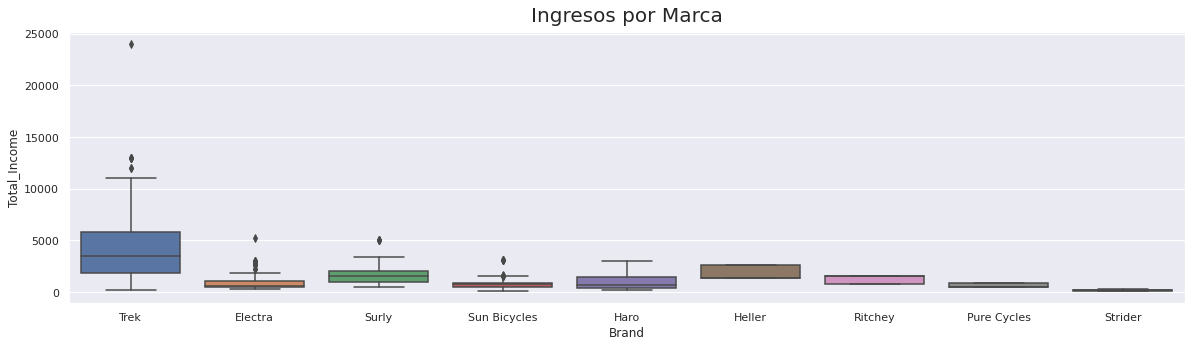

In [49]:
sns.boxplot(x='Brand', y = 'Total_Income', data = BikeStores) 
sns.set(rc = {'figure.figsize':(10,5)})
plt.title("Ingresos por Marca", fontsize=20, verticalalignment='bottom')
plt.show()

Podemos confirmar que la marca Trek es la que genera los mayores ingresos. 

Pero, se comportará igual en las 3 tiendas? Veamoslo:


Ahora nos interesa saber la Marca más vendida en términos de unidades.

In [50]:
TotalBrandq = pd.DataFrame(columns=['Brand','quantity']) #Generación del DataFrame "TotalBrandq"
TotalBrandq['Brands'] = ['Trak', 'Electra', 'Surly','Sun Bicycles', 'Haro', 'Heller', 'Ritchey','PureCycles', 'Strider']
TotalBrandq['Totals']= [598, 919, 300, 261, 130, 42, 39, 122, 2]

In [51]:
x = TotalBrandq['Brands']
y = TotalBrandq['Totals']


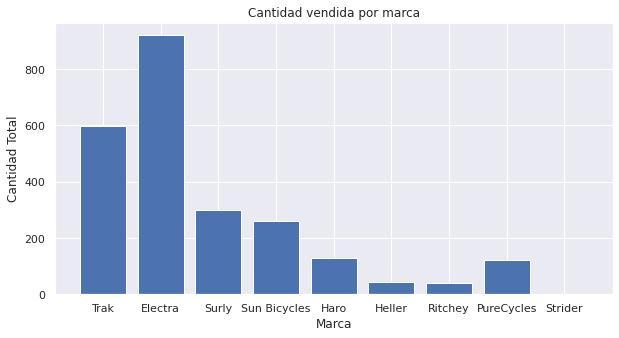

In [52]:
plt.bar(x, y)
plt.ylabel('Cantidad Total')
plt.xlabel('Marca')
plt.title('Cantidad vendida por marca')
plt.show()

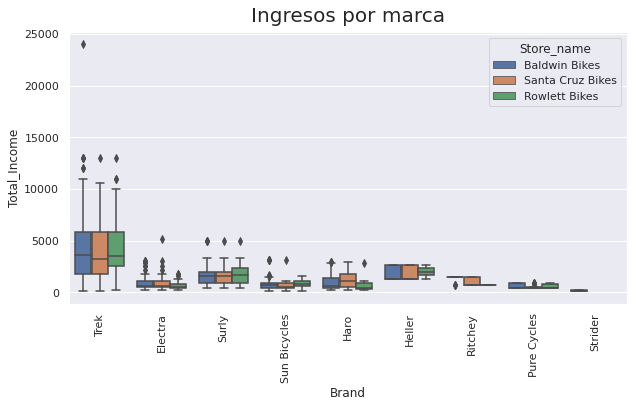

In [53]:
sns.boxplot(x='Brand', y = 'Total_Income', hue = 'Store_name',data = BikeStores) 
sns.set(rc = {'figure.figsize':(12,10)})
plt.title("Ingresos por marca", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);

Efectivamente la marca Trek es la que genera los mayores ingresos en las 3 tiendas

Completamos nuestro análsis con el análisis de las categorías, se nos ha explicado que dentro de cada categoría podemos tener una, dos o hasta 3 Marcas consideradas.

In [54]:
ComfortBikes= BikeStores.query('Category=="Comfort Bicycles"')#Separamos los datos por categoría para prepara un nuevo DF
ComfortBikes.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
252,1517.0,1.0,303.0,2.0,2599.99,0.07,181.9993,4835.9814,Electra Townie Go! 8i - 2017/2018,1.0,...,(831) 555-5555,1.0,1.0,Mireya Copeland,0.0,NaN,NaN,OK,3.0,5199.98


In [55]:
ComfortBikes.quantity.sum()

295.0

In [56]:
ChildrenBikes= BikeStores.query('Category=="Children Bicycles"')
ChildrenBikes.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
980,719.0,1.0,100.0,1.0,489.99,0.2,97.998,391.992,Electra Townie 3i EQ (20-inch) - Boys' - 2017,1.0,...,(516) 379-4445,1.0,5.0,Marcelene Boyer,3.0,2.0,1.0,OK,4.0,489.99


In [57]:
ChildrenBikes.quantity.sum()

401.0

In [58]:
CruisersBikes= BikeStores.query('Category=="Cruisers Bicycles"')
CruisersBikes.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
168,1388.0,1.0,251.0,1.0,2999.99,0.1,299.999,2699.991,Electra Townie Commute Go! - 2018,1.0,...,(516) 379-4446,1.0,5.0,Venita Daniel,3.0,3.0,0.0,Same Day,5.0,2999.99


In [59]:
CruisersBikes.quantity.sum()

700.0

In [60]:
CyclocrossBikes= BikeStores.query('Category=="Cyclocross Bicycles"')
CyclocrossBikes.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
78,1431.0,1.0,207.0,1.0,3999.99,0.1,399.999,3599.991,Trek Boone 7 Disc - 2018,9.0,...,(516) 379-4445,1.0,5.0,Marcelene Boyer,1.0,3.0,-2.0,Late,7.0,3999.99


In [61]:
CyclocrossBikes.quantity.sum()

122.0

In [62]:
ElectricBikes= BikeStores.query('Category=="Electric Bikes"')
ElectricBikes.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
41,1334.0,1.0,203.0,2.0,4999.99,0.05,249.9995,9499.981,Trek Powerfly 7 FS - 2018,9.0,...,(516) 379-4445,1.0,5.0,Marcelene Boyer,2.0,3.0,-1.0,Late,7.0,9999.98


In [63]:
ElectricBikes.quantity.sum()

106.0

In [64]:
MountainBikes= BikeStores.query('Category=="Mountain Bikes"')
MountainBikes.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
24,955.0,1.0,43.0,1.0,5299.99,0.1,529.999,4769.991,Trek Fuel EX 9.8 27.5 Plus - 2017,9.0,...,(516) 379-4445,1.0,5.0,Marcelene Boyer,2.0,1.0,1.0,OK,6.0,5299.99


In [65]:
MountainBikes.quantity.sum()

607.0

In [66]:
RoadBikes= BikeStores.query('Category=="Road Bikes"')
RoadBikes.head(1)

,order_id,item_id,product_id,quantity,List_Price,%_discount,$_discount,Final_price,Product,brand_id,...,Staff_phone,Staff_active,Staff_manager_id,Staff_Name,Days_between_order_and_required,Days_between_order_and_shipment,Days_between_shipment_and_required,Shipment_status,Order_weekday _#,Total_Income
0,1541.0,1.0,155.0,2.0,11999.99,0.1,1199.999,21599.982,Trek Domane SLR 9 Disc - 2018,9.0,...,(516) 379-4446,1.0,5.0,Venita Daniel,0.0,NaN,NaN,OK,1.0,23999.98


In [67]:
RoadBikes.quantity.sum()

182.0

Procedemos a la generación del DF

In [68]:
Category_quantity = pd.DataFrame(columns=['Category','quantity']) #Generación del DataFrame "Category_quantity"
Category_quantity['Category'] = ['Comfort Bicycles', 'Children Bicycles', 'Cruisers Bicycles','Cyclocross Bicycles', 'Electric Bikes', 'Mountain Bikes', 'Road Bikes']
Category_quantity['Totals']= [295, 401, 700, 122, 106, 607, 182]

In [69]:
x = Category_quantity['Category']
y = Category_quantity['Totals']


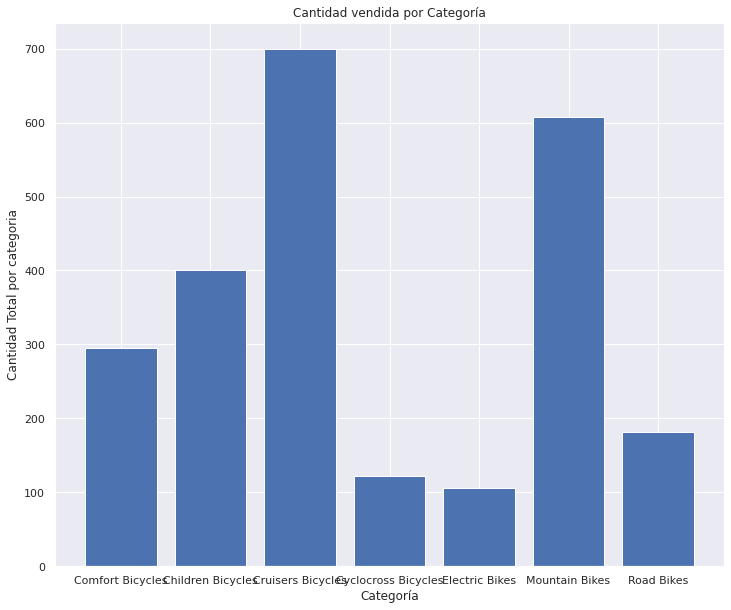

In [70]:
plt.bar(x, y)
plt.ylabel('Cantidad Total por categoria')
plt.xlabel('Categoría')
plt.title('Cantidad vendida por Categoría')
plt.show()

Con respecto a la Categoría de bicis más solicitadas por los clientes, vemos que se trata de las bicis clasificadas como #Cruisers Bicycles#, dentro de esta categoría encontramos marcas como Elektra, Pure y Sun Bikes, todas ellas son bicis destinadas más a paseos, especiales para recorrer Central Park de la manera más cómoda.

Ahora pasamos a la segunda parte de nuestro trabajo, podremos recomendar a la empresa personas a las que le podría otorgar bonos o subirlos de categoría? Veamos entonces las ventas por empleado en cada tienda.

---



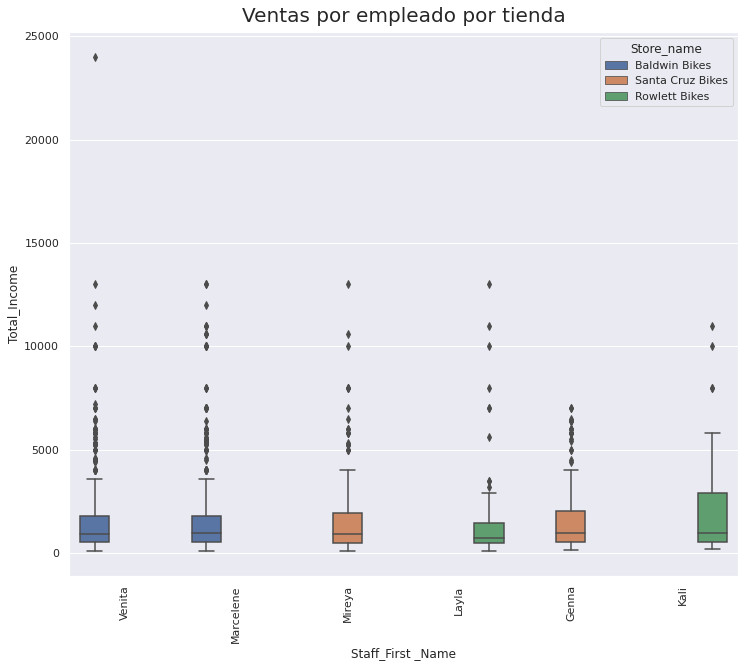

In [71]:
sns.boxplot(x='Staff_First _Name', y = 'Total_Income', hue = 'Store_name',data = BikeStores) 
sns.set(rc = {'figure.figsize':(10,5)})
plt.title("Ventas por empleado por tienda", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);

En la tienda Baldwin Bikes las ventas de sus empleados Marcelene y Venita son muy similares, pero vemos una pequeña diferencia a favor de Marcelene.
En Sta Cruz Bikes podemos apreciar que el empleado que generó mayores ingresos fue Genna.

En el caso de Rowlett Bikes el mayor ingreso lo generó Kaii.

## **CONLUSIONES**

Acorde al pedido de los dueños, hemos revisado toda la información recibida con respecto a las ventas de sus 3 tiendas principales y hemos realzado diferentes análisis para mejorar la interpretación de los datos, podemos concluir lo siguiente:

1)- Cuales son los puntos de venta que han generado los mayores ingresos en los últimos años.

La tienda Baldwin, en el estado de Nueva York es la que mayores ingresos en total genera.

2)- De la tienda con mayores ingresos, cual es el empleado/a que ha generado los mayores ingresos por ventas para analizar la posibilidad de otorgarle un bono.

Marcelene de Baldwin Bikes, en la empleada que genera los mayores ingresos por ventas de la tienda. Recomendamos otorgarle una bonificación o ofrecerle un cargo más elevado (con incremento de sueldo) para motivarla a seguir trabajando tan bien.

Así mismo, recomendamos también otorga alguna bonificación/reconocimiento a los mejores vendedores de las otras dos tiendas. Con el objetivo de motivarlos a incrementar aún más sus ventas y ayudar a potenciar el resto del equipo.

Estos reconocimientos deberían otrorgarse a Genna de Sta Cruz Bikes y Kaii de Rowlett Bikes

3)- La marca que genera los mayores ingresos.

Con respecto a los ingresos por Marca, Trek Brand es la que genera los mayores ingresos en las 3 tiendas.

En segundo lugar se encuentra Surly y luego Haro.

Recomendamos mantener las estrategias de marketing para estas 3 marcas pero sí sería bueno incluir nuevas iniciativas para marcas como Strider y Pure Cycles que tiene poca salida.

4)- La marca más vendida.
Conrespecto a la cantidade de unidades vendidas, la marca Trek es la lleva la delantera con respecto a las otras.
Como mencionamos en el documento se trata de una marca de bicis cuyo uso más frecuente es en la ciudad y su principal comprador son estudiantes.

# Importación de Librerías para trabajar con APIS




Incorporamos la conexión a la API **NYCDCP Manhattan Bike Counts - Off Street**. 
Nos interesa principalmente evaluar como ha aumentado la cantidad de biciletas que circulan por la ciudad de Nueva York en los últimos años. 
Esta API es creada por la División de Transporte del Departamento de Planificación de la Ciudad de Nueva York (NYCDCP) quienes han realizado recuentos anuales de bicicletas en Manhattan desde 1999. Los recuentos se han llevado a cabo a lo largo de rutas designadas para bicicletas en 10 ubicaciones en la calle y 5 fuera de la calle durante la temporada de otoño. Estas ubicaciones se han mantenido generalmente consistentes. 
Los datos recopilados incluyen el volumen de ciclistas / usuarios, el uso del casco, el uso del carril bici, el género, etc. Los datos de los recuentos de bicicletas pueden ofrecer información sobre las tendencias generales en la demografía de los usuarios y los patrones de viaje a lo largo del tiempo.

In [72]:
import requests
import pandas as pd
import json
url='https://data.cityofnewyork.us/resource/mfmf-gtvc.json'
df= requests.get(url)
print(df)

<Response [200]>


In [73]:
import folium
from folium.plugins import HeatMap

In [74]:
from matplotlib import animation
import matplotlib.pyplot as plt

In [75]:
print(len(df.text))
df.text 

40708


'[{"locationid":"11","locationtype":"Off-Street","typeoftime":"Weekday","location":"East River at E Houston St.","location_lat":"40.718708999999997","location_long":"-73.974100000000007","year":"2005","alluservolume":"1315","cyclists_all":"426","cyc_greenway_only":"426","cyc_helmet_greenwy":"133","citibike_all":"0","non_citibikecyc":"426","rllrbld_scootr":"17","jogger":"498","walker":"374"}\n,{"locationid":"11","locationtype":"Off-Street","typeoftime":"Weekday","location":"East River at E Houston St.","location_lat":"40.718708999999997","location_long":"-73.974100000000007","year":"2006","alluservolume":"1170","cyclists_all":"315","cyc_greenway_only":"315","cyc_helmet_greenwy":"117","citibike_all":"0","non_citibikecyc":"315","rllrbld_scootr":"11","jogger":"502","walker":"342"}\n,{"locationid":"11","locationtype":"Off-Street","typeoftime":"Weekday","location":"East River at E Houston St.","location_lat":"40.718708999999997","location_long":"-73.974100000000007","year":"2007","alluservol

In [76]:
texto=df.text
jsondata = json.loads(texto) # texto a json
df2=pd.DataFrame.from_dict(jsondata) # json a dataframe
df2.head(1)

,locationid,locationtype,typeoftime,location,location_lat,location_long,year,alluservolume,cyclists_all,cyc_greenway_only,...,non_citibikecyc,rllrbld_scootr,jogger,walker,cycmalehel_greenwy,cycmale_greenwy,cycfemalehell_greenwy,cycfemale_greenwy,cyclists_male,cyclists_female
0,11,Off-Street,Weekday,East River at E Houston St.,40.718708999999997,-73.974100000000007,2005,1315,426,426,...,426,17,498,374,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df2.shape

(89, 22)

Vamos a revisar si el el nuevo data set, que generamos a partir de la API tiene duplicados y valores nulos.

In [78]:
df2.duplicated().sum()

0

In [79]:
df2.isnull().sum()

locationid                0
locationtype              0
typeoftime                0
location                  0
location_lat              0
location_long             0
year                      0
alluservolume             0
cyclists_all              0
cyc_greenway_only         0
cyc_helmet_greenwy        0
citibike_all              0
non_citibikecyc           0
rllrbld_scootr            0
jogger                    0
walker                    0
cycmalehel_greenwy       53
cycmale_greenwy          53
cycfemalehell_greenwy    53
cycfemale_greenwy        53
cyclists_male            53
cyclists_female          53
dtype: int64

In [80]:
df2_sin_duplicado = df2.drop_duplicates() #Eliminamos los duplicados


In [81]:
df2 #Volvemos a mostrar el data set sin duplicados

,locationid,locationtype,typeoftime,location,location_lat,location_long,year,alluservolume,cyclists_all,cyc_greenway_only,...,non_citibikecyc,rllrbld_scootr,jogger,walker,cycmalehel_greenwy,cycmale_greenwy,cycfemalehell_greenwy,cycfemale_greenwy,cyclists_male,cyclists_female
0,11,Off-Street,Weekday,East River at E Houston St.,40.718708999999997,-73.974100000000007,2005,1315,426,426,...,426,17,498,374,NaN,NaN,NaN,NaN,NaN,NaN
1,11,Off-Street,Weekday,East River at E Houston St.,40.718708999999997,-73.974100000000007,2006,1170,315,315,...,315,11,502,342,NaN,NaN,NaN,NaN,NaN,NaN
2,11,Off-Street,Weekday,East River at E Houston St.,40.718708999999997,-73.974100000000007,2007,1422,451,451,...,451,12,629,334,NaN,NaN,NaN,NaN,NaN,NaN
3,11,Off-Street,Weekday,East River at E Houston St.,40.718708999999997,-73.974100000000007,2008,1672,460,460,...,460,10,728,474,NaN,NaN,NaN,NaN,NaN,NaN
4,11,Off-Street,Weekday,East River at E Houston St.,40.718708999999997,-73.974100000000007,2009,1399,715,715,...,715,36,412,236,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,14,Off-Street,Weekend,Route 9A Greenway at 80th St.,40.786529000000002,-73.984583999999998,2005,2846,1395,1395,...,1395,95,597,758,NaN,NaN,NaN,NaN,NaN,NaN
85,11,Off-Street,Weekend,East River at E Houston St.,40.718708999999997,-73.974100000000007,2015,2417,551,281,...,426,35,1317,514,94,197,50,84,378,173
86,13,Off-Street,Weekend,East River Greenway at E90th St.,40.777374000000002,-73.942531000000002,2010,1122,239,239,...,239,16,381,486,NaN,NaN,NaN,NaN,NaN,NaN
87,14,Off-Street,Weekend,Route 9A Greenway at 80th St.,40.786529000000002,-73.984583999999998,2013,3607,2184,2184,...,2152,25,704,694,1003,1453,501,731,1453,731


# **Análisis de nuevas variables**

En este nuevo data set nos encontramos con las siguientes variables: 

*   **location**: Nos indica la dirección donde se encuentra la bicicleta.
*   **location_lat**: Latitud de la dirección.
*  **location_long**: Longitud de la direccón.
* **year**: Año del registro.
* **cyclists_all**:Cicliastas totales.	
* **cyclists_male**:Cantidad de ciclistas hombres.
* **cyclists_female**: Cantidad de ciclistas mujeres.


In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   locationid             89 non-null     object
 1   locationtype           89 non-null     object
 2   typeoftime             89 non-null     object
 3   location               89 non-null     object
 4   location_lat           89 non-null     object
 5   location_long          89 non-null     object
 6   year                   89 non-null     object
 7   alluservolume          89 non-null     object
 8   cyclists_all           89 non-null     object
 9   cyc_greenway_only      89 non-null     object
 10  cyc_helmet_greenwy     89 non-null     object
 11  citibike_all           89 non-null     object
 12  non_citibikecyc        89 non-null     object
 13  rllrbld_scootr         89 non-null     object
 14  jogger                 89 non-null     object
 15  walker                 89

In [83]:
df2['cyclists_all']=df2.cyclists_all.astype(float)# Convertimos la cadenas a float
df2['cyclists_male']=df2.cyclists_male.astype(float) 
df2['cyclists_female']=df2.cyclists_female.astype(float) 
df2['alluservolume']=df2.cyclists_female.astype(float) 
df2['year'] = df2.year.astype(int) # faltaba agregar los años
df2.head(1)

,locationid,locationtype,typeoftime,location,location_lat,location_long,year,alluservolume,cyclists_all,cyc_greenway_only,...,non_citibikecyc,rllrbld_scootr,jogger,walker,cycmalehel_greenwy,cycmale_greenwy,cycfemalehell_greenwy,cycfemale_greenwy,cyclists_male,cyclists_female
0,11,Off-Street,Weekday,East River at E Houston St.,40.718708999999997,-73.974100000000007,2005,NaN,426.0,426,...,426,17,498,374,NaN,NaN,NaN,NaN,NaN,NaN


# Ubicamos las estaciones en el mapa de Nueva York

In [84]:
m = folium.Map(location=[40.718708999999997,-73.974100000000007],zoom_start=12) #Ubicamos las estaciones en el mapa de Nueva York

folium.Marker(
    location=[40.718708999999997,-73.974100000000007],
    popup="East River at E Houston St.",
    icon=folium.Icon(color="green"),
).add_to(m)
folium.Marker(
    location=[40.735340000000001, -74.010569000000004],
    popup="Route 9A at 11th St.",
    icon=folium.Icon(color="green"),
).add_to(m)
folium.Marker(
    location=[40.777374000000002, -73.942531000000002],
    popup="East River Greenway at E90th St.",
    icon=folium.Icon(color="green"),
).add_to(m)
folium.Marker(
    location=[40.818769000000003, -73.961127000000005],
    popup="Route 9A Greenway at 125th St.",
    icon=folium.Icon(color="green"),
).add_to(m)
folium.Marker(
    location=[40.786529000000002, -73.984583999999998],
    popup="Route 9A Greenway at 80th St.",
    icon=folium.Icon(color="green"),
).add_to(m)
m


In [85]:
df2.cyclists_all.sum() #Total de ciclistas que han pasado por las estaciones

106526.5

# Cantidad de ciclistas totales que han pasado por las estaciones en los últimos años

Text(0.5, 1.0, 'Usuarios por año')

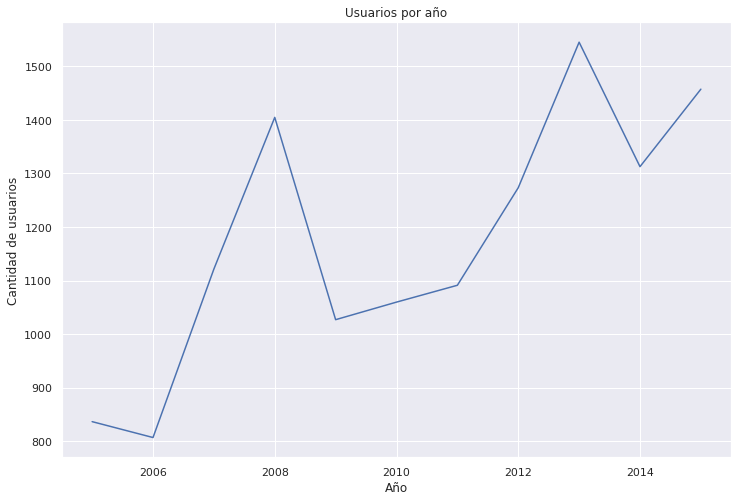

In [86]:
plt.figure(figsize=(12, 8)) #Queremos saber la cantidad de usuarios que pasaron por las estaciones en los últimos años
sns.lineplot(x="year", y="cyclists_all", data=df2, ci=None) 
plt.xlabel('Año') 
plt.ylabel('Cantidad de usuarios') 
plt.title('Usuarios por año')

# Cantidad de ciclistas que han pasado por cada estación en los últimos años

Text(0.5, 1.0, 'Usuarios por año')

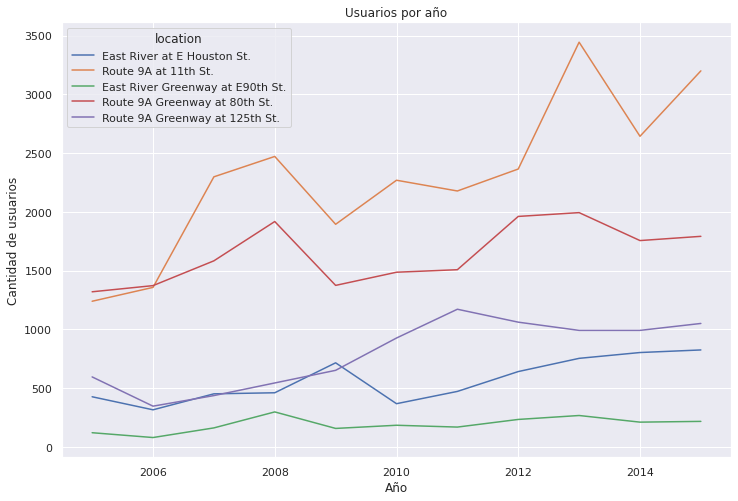

In [87]:
plt.figure(figsize=(12, 8)) #Queremos saber la cantidad de usuarios que pasaron por las estaciones en los últimos años
sns.lineplot(x="year", y="cyclists_all", hue="location", data=df2, ci=None) 
plt.xlabel('Año') 
plt.ylabel('Cantidad de usuarios') 
plt.title('Usuarios por año')

In [88]:
# Estaciones a graficar
estacion_plot = ['Route 9A Greenway at 80th St.', 'Route 9A Greenway at 125th St.', 'East River Greenway at E90th St.']
linea_plot = df2.loc[df2['location'].isin(estacion_plot), :] # hacemos una extracción de las estaciones a graficar
linea_plot.head(1)

,locationid,locationtype,typeoftime,location,location_lat,location_long,year,alluservolume,cyclists_all,cyc_greenway_only,...,non_citibikecyc,rllrbld_scootr,jogger,walker,cycmalehel_greenwy,cycmale_greenwy,cycfemalehell_greenwy,cycfemale_greenwy,cyclists_male,cyclists_female
22,13,Off-Street,Weekday,East River Greenway at E90th St.,40.777374000000002,-73.942531000000002,2005,NaN,120.0,120,...,120,9,122,147,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# Funcion para actulizar la linea 

def update_linechart(i): # i es el indice del año en el dataframe
  for j in range(len(colors)): # hacemos un for sobre los colores
    location = estacion_plot[j] # asociamos un color a cada estacion
    color = colors[j]
    data = linea_plot.loc[linea_plot['location'] == location,:] # Extraemos por location
    ax.plot(data.year[:i], data.cyclists_all[:i], color) # Graficamos años y pib con un color caracteristico
    ax.legend(estacion_plot) # Agregamos las etiquetas a los datos

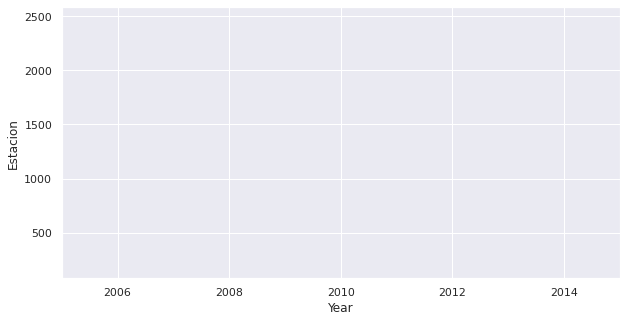

In [90]:
# Definir los colores
colors = ['red', 'green', 'blue']

# Definimos la figura
fig, ax = plt.subplots()
ax.set_xlim(linea_plot.year.min(), linea_plot.year.max())
ax.set_ylim(linea_plot.cyclists_all.min(), linea_plot.cyclists_all.max())
ax.set_xlabel('Year')
ax.set_ylabel('Estacion')
plt.show()


In [91]:
num_frames = len(linea_plot['year'].unique()) # contamos el numero de años unicos
animacion = animation.FuncAnimation(fig, update_linechart, frames = num_frames,interval=500) # Creamos la animación 

In [92]:
from IPython.display import HTML


In [93]:
HTML(animacion.to_html5_video()) # visualizamos la animación

# Grafica con Ploty - Total de ciclistas por año

Para que esta gráfica muestre los datos primero hay que sumar el total de ciclistas de cada año, generar un nuevo dataframe y recien aplicar el scrip de la gráfica

In [94]:
Year_2005 = df2.query('year=="2005"')
Year_2005.head(1)

,locationid,locationtype,typeoftime,location,location_lat,location_long,year,alluservolume,cyclists_all,cyc_greenway_only,...,non_citibikecyc,rllrbld_scootr,jogger,walker,cycmalehel_greenwy,cycmale_greenwy,cycfemalehell_greenwy,cycfemale_greenwy,cyclists_male,cyclists_female


In [95]:
Year_2007 = df2.query('year=="2007"')
Year_2007.head(1)

,locationid,locationtype,typeoftime,location,location_lat,location_long,year,alluservolume,cyclists_all,cyc_greenway_only,...,non_citibikecyc,rllrbld_scootr,jogger,walker,cycmalehel_greenwy,cycmale_greenwy,cycfemalehell_greenwy,cycfemale_greenwy,cyclists_male,cyclists_female


In [96]:
Year_2010 = df2.query('year=="2010"')
Year_2010.head(1)

,locationid,locationtype,typeoftime,location,location_lat,location_long,year,alluservolume,cyclists_all,cyc_greenway_only,...,non_citibikecyc,rllrbld_scootr,jogger,walker,cycmalehel_greenwy,cycmale_greenwy,cycfemalehell_greenwy,cycfemale_greenwy,cyclists_male,cyclists_female


In [97]:
Year_2012 = df2.query('year=="2012"')
Year_2012.head(1)

,locationid,locationtype,typeoftime,location,location_lat,location_long,year,alluservolume,cyclists_all,cyc_greenway_only,...,non_citibikecyc,rllrbld_scootr,jogger,walker,cycmalehel_greenwy,cycmale_greenwy,cycfemalehell_greenwy,cycfemale_greenwy,cyclists_male,cyclists_female


In [98]:
Year_2015 = df2.query('year=="2015"')
Year_2015.head(1)

,locationid,locationtype,typeoftime,location,location_lat,location_long,year,alluservolume,cyclists_all,cyc_greenway_only,...,non_citibikecyc,rllrbld_scootr,jogger,walker,cycmalehel_greenwy,cycmale_greenwy,cycfemalehell_greenwy,cycfemale_greenwy,cyclists_male,cyclists_female


In [99]:
Year_2005.cyclists_all.sum()

0.0

In [100]:
Year_2007.cyclists_all.sum()

0.0

In [101]:
Year_2010.cyclists_all.sum()

0.0

In [102]:
Year_2012.cyclists_all.sum()

0.0

In [103]:
Year_2015.cyclists_all.sum()

0.0

In [104]:
TotalCiclistas = pd.DataFrame(columns=['year','total']) #Generación del DataFrame "TotaleCiclistas
TotalCiclistas['year'] = ['2005', '2007', '2010' , '2012' , '2015']
TotalCiclistas['total']= [5019, 8971, 9537, 11459, 13115]

In [105]:
import plotly.graph_objects as go
fig = go.Figure() 

In [106]:
# linea
fig.add_trace(go.Scatter(x=TotalCiclistas.year, y=TotalCiclistas.total,
                         mode='lines+markers', name='TotalCiclistas',
                         line=dict(color='firebrick',width=2,
                                   dash='dashdot')))

# Actulizamos y vemos los resultados
fig.update_layout(title='Total Ciclistas por año',
                  xaxis_title='Año',yaxis_title='Total')

Se puede observar como a lo largo de los años ha ido aumentando la cantidad de ciclistas en Nueva York

# Grafica con Ploty - Total de ciclistas por año por estación

In [107]:
df2.query("location=='Route 9A Greenway at 125th St.'")

,locationid,locationtype,typeoftime,location,location_lat,location_long,year,alluservolume,cyclists_all,cyc_greenway_only,...,non_citibikecyc,rllrbld_scootr,jogger,walker,cycmalehel_greenwy,cycmale_greenwy,cycfemalehell_greenwy,cycfemale_greenwy,cyclists_male,cyclists_female
44,15,Off-Street,Weekday,Route 9A Greenway at 125th St.,40.818769000000003,-73.961127000000005,2005,NaN,595.0,595,...,595,11,61,71,NaN,NaN,NaN,NaN,NaN,NaN
45,15,Off-Street,Weekday,Route 9A Greenway at 125th St.,40.818769000000003,-73.961127000000005,2006,NaN,346.0,346,...,346,8,62,48,NaN,NaN,NaN,NaN,NaN,NaN
46,15,Off-Street,Weekday,Route 9A Greenway at 125th St.,40.818769000000003,-73.961127000000005,2007,NaN,436.0,436,...,436,5,51,64,NaN,NaN,NaN,NaN,NaN,NaN
47,15,Off-Street,Weekday,Route 9A Greenway at 125th St.,40.818769000000003,-73.961127000000005,2009,NaN,651.0,651,...,651,14,121,101,NaN,NaN,NaN,NaN,NaN,NaN
48,15,Off-Street,Weekday,Route 9A Greenway at 125th St.,40.818769000000003,-73.961127000000005,2010,NaN,926.0,926,...,926,18,111,115,NaN,NaN,NaN,NaN,NaN,NaN
49,15,Off-Street,Weekday,Route 9A Greenway at 125th St.,40.818769000000003,-73.961127000000005,2011,NaN,1171.0,1171,...,1171,13,112,102,NaN,NaN,NaN,NaN,NaN,NaN
50,15,Off-Street,Weekday,Route 9A Greenway at 125th St.,40.818769000000003,-73.961127000000005,2012,250.0,1061.0,1061,...,1061,5,113,47,532,811,198,250,811.0,250.0
51,15,Off-Street,Weekday,Route 9A Greenway at 125th St.,40.818769000000003,-73.961127000000005,2013,220.0,991.0,991,...,990,4,64,50,530,771,161,220,771.0,220.0
52,15,Off-Street,Weekday,Route 9A Greenway at 125th St.,40.818769000000003,-73.961127000000005,2014,218.0,991.0,991,...,989,8,89,154,533,773,161,218,773.0,218.0
53,15,Off-Street,Weekday,Route 9A Greenway at 125th St.,40.818769000000003,-73.961127000000005,2015,232.0,1050.0,1050,...,1045,7,90,72,566,818,173,232,818.0,232.0


In [108]:
a = df2.query("location=='East River Greenway at E90th St.'") #Tenemos un problema porque tenemos datos repetidos/incompletos que están etiquetados por los mismos años para una estación en particular
a


,locationid,locationtype,typeoftime,location,location_lat,location_long,year,alluservolume,cyclists_all,cyc_greenway_only,...,non_citibikecyc,rllrbld_scootr,jogger,walker,cycmalehel_greenwy,cycmale_greenwy,cycfemalehell_greenwy,cycfemale_greenwy,cyclists_male,cyclists_female
22,13,Off-Street,Weekday,East River Greenway at E90th St.,40.777374000000002,-73.942531000000002,2005,NaN,120.0,120,...,120,9,122,147,NaN,NaN,NaN,NaN,NaN,NaN
23,13,Off-Street,Weekday,East River Greenway at E90th St.,40.777374000000002,-73.942531000000002,2006,NaN,79.0,79,...,79,6,137,120,NaN,NaN,NaN,NaN,NaN,NaN
24,13,Off-Street,Weekday,East River Greenway at E90th St.,40.777374000000002,-73.942531000000002,2007,NaN,125.0,125,...,125,3,382,688,NaN,NaN,NaN,NaN,NaN,NaN
25,13,Off-Street,Weekday,East River Greenway at E90th St.,40.777374000000002,-73.942531000000002,2008,NaN,120.0,120,...,120,4,465,736,NaN,NaN,NaN,NaN,NaN,NaN
26,13,Off-Street,Weekday,East River Greenway at E90th St.,40.777374000000002,-73.942531000000002,2009,NaN,108.0,108,...,108,2,417,526,NaN,NaN,NaN,NaN,NaN,NaN
27,13,Off-Street,Weekday,East River Greenway at E90th St.,40.777374000000002,-73.942531000000002,2010,NaN,128.0,128,...,128,1,552,715,NaN,NaN,NaN,NaN,NaN,NaN
28,13,Off-Street,Weekday,East River Greenway at E90th St.,40.777374000000002,-73.942531000000002,2011,NaN,161.0,161,...,161,1,398,793,NaN,NaN,NaN,NaN,NaN,NaN
29,13,Off-Street,Weekday,East River Greenway at E90th St.,40.777374000000002,-73.942531000000002,2012,33.0,169.0,169,...,169,1,493,612,70,136,16,33,136.0,33.0
30,13,Off-Street,Weekday,East River Greenway at E90th St.,40.777374000000002,-73.942531000000002,2013,51.0,195.0,195,...,195,2,508,769,74,144,33,51,144.0,51.0
31,13,Off-Street,Weekday,East River Greenway at E90th St.,40.777374000000002,-73.942531000000002,2014,58.0,223.0,223,...,223,4,594,725,88,165,33,58,165.0,58.0


In [109]:
df2.columns

Index(['locationid', 'locationtype', 'typeoftime', 'location', 'location_lat',
       'location_long', 'year', 'alluservolume', 'cyclists_all',
       'cyc_greenway_only', 'cyc_helmet_greenwy', 'citibike_all',
       'non_citibikecyc', 'rllrbld_scootr', 'jogger', 'walker',
       'cycmalehel_greenwy', 'cycmale_greenwy', 'cycfemalehell_greenwy',
       'cycfemale_greenwy', 'cyclists_male', 'cyclists_female'],
      dtype='object')

In [110]:
for station, data_station in df2.groupby('location'):
    print(station)
    print(len(data_station.year.tolist()))
    print(len(data_station.cyclists_all.tolist()))
#No tenemos los mismos años para todas las estaciones

East River Greenway at E90th St.
20
20
East River at E Houston St.
17
17
Route 9A Greenway at 125th St.
10
10
Route 9A Greenway at 80th St.
22
22
Route 9A at 11th St.
20
20


In [111]:
df2.year.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [112]:
for station, data_station in df2.groupby('location'):
    print(station)
    for year, data_station_year in data_station.groupby('year'):
        
        print(year)
        print(data_station_year.cyclists_all.mean())

East River Greenway at E90th St.
2005
120.0
2006
79.0
2007
161.0
2008
297.0
2009
156.5
2010
183.5
2011
168.0
2012
233.0
2013
266.5
2014
210.0
2015
216.5
East River at E Houston St.
2005
426.0
2006
315.0
2007
451.0
2008
460.0
2009
715.0
2010
367.0
2011
471.5
2012
640.5
2013
753.0
2014
802.5
2015
824.5
Route 9A Greenway at 125th St.
2005
595.0
2006
346.0
2007
436.0
2009
651.0
2010
926.0
2011
1171.0
2012
1061.0
2013
991.0
2014
991.0
2015
1050.0
Route 9A Greenway at 80th St.
2005
1319.5
2006
1372.0
2007
1583.0
2008
1917.5
2009
1374.0
2010
1486.0
2011
1507.5
2012
1961.0
2013
1993.25
2014
1755.5
2015
1791.5
Route 9A at 11th St.
2005
1239.0
2006
1357.0
2007
2298.0
2008
2471.5
2009
1894.0
2010
2269.0
2011
2177.5
2012
2364.5
2013
3444.0
2014
2643.0
2015
3200.0


In [113]:
fig = go.Figure() #La forma de procesar la información de más fue promediar los datos duplicados.
for station, data_station in df2.groupby('location'):
    years=[]
    data=[]
    for year, data_station_year in data_station.groupby('year'):
        years.append(year)
        data.append(data_station_year.cyclists_all.mean())
    fig.add_scatter(x=years,y=data,name=station,mode='lines')
    
fig.update_layout(title='Total Ciclistas por año',
                  xaxis_title='Año',yaxis_title='Total')